In [1]:
import sys
import torch
import torch.optim as optim
import torchvision
import argparse
import torch.nn as nn
import pandas as pd
import re
import os
import seaborn as sns
from torchvision import transforms
from matplotlib.pyplot import figure
from matplotlib import pyplot as plt
from utils import *

sys.argv = ['']

parser = argparse.ArgumentParser(description='Parameters training')
parser.add_argument('--model_architecture', type=str, default="VGG16", help='....')
parser.add_argument('--dataset', type=str, default="CIFAR10", help='....')
parser.add_argument('--batch_size', type=int, default=8, help='....')
parser.add_argument('--device', type=str, default=None, help='....')
parser.add_argument('--eval_metric', default="accuracy", help='....')

args = parser.parse_args()

if args.device is None:
    import torch
    args.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [7]:
##
# Modify if necessary
args.dataset = "Date_Fruit_7classes"
args.eval_metric = "f1_score"
base_percentage = 50
custom_split = 1
##


model_directory = f"models/{args.dataset}"
model_paths = []

for filename in os.listdir(model_directory):
    if filename.endswith(".pth"):
        model_path = os.path.join(model_directory, filename)
        model_paths.append(model_path)

In [3]:
_, test_loader, num_classes = get_dataset(args, custom_split = custom_split)

In [8]:
df = pd.DataFrame({'model_paths': model_paths})
df['model_type'] = df['model_paths'].apply(lambda x: re.search(fr'(HOMOGENEA|CRECIENTE|DECRECIENTE|MAS_MENOS_MAS|MENOS_MAS_MENOS|{args.model_architecture}_{args.dataset}_UNPRUNED)', x).group())
df['finetuned'] = df['model_paths'].apply(lambda x: 'FT' in x)
df['seed'] = df['model_paths'].apply(lambda x: re.search(r'(?<=SEED_)\d+', x).group() if re.search(r'(?<=SEED_)\d+', x) else None)
df

,model_paths,model_type,finetuned,seed
0,models/Date_Fruit_7classes\VGG16_Date_Fruit_7c...,CRECIENTE,True,112
1,models/Date_Fruit_7classes\VGG16_Date_Fruit_7c...,CRECIENTE,True,167
2,models/Date_Fruit_7classes\VGG16_Date_Fruit_7c...,CRECIENTE,True,23
3,models/Date_Fruit_7classes\VGG16_Date_Fruit_7c...,CRECIENTE,True,42
4,models/Date_Fruit_7classes\VGG16_Date_Fruit_7c...,CRECIENTE,True,97
5,models/Date_Fruit_7classes\VGG16_Date_Fruit_7c...,DECRECIENTE,True,112
6,models/Date_Fruit_7classes\VGG16_Date_Fruit_7c...,DECRECIENTE,True,167
7,models/Date_Fruit_7classes\VGG16_Date_Fruit_7c...,DECRECIENTE,True,23
8,models/Date_Fruit_7classes\VGG16_Date_Fruit_7c...,DECRECIENTE,True,42
9,models/Date_Fruit_7classes\VGG16_Date_Fruit_7c...,DECRECIENTE,True,97


In [6]:
df['metric'] = 0
criterion = nn.CrossEntropyLoss()
for i,model_path in enumerate(model_paths):
    model = torch.load(model_path)
    test_loss, test_acc = test_epoch(model, args.device, test_loader, criterion, args.eval_metric, num_classes)
    if torch.is_tensor(test_acc):
        test_acc = test_acc.item()
    df['metric'].iloc[i] = test_acc
    print(f"{args.eval_metric} del modelo {model_path}: {test_acc:.3f}")

C:\Users\JavierP\AppData\Local\Temp\ipykernel_1916\1741347685.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['metric'].iloc[i] = test_acc


f1_score del modelo models/Date_Fruit_7classes\VGG16_Date_Fruit_7classes_CRECIENTE_50_PRUNED_FT_SEED_112.pth: 0.763
f1_score del modelo models/Date_Fruit_7classes\VGG16_Date_Fruit_7classes_CRECIENTE_50_PRUNED_FT_SEED_167.pth: 0.762
f1_score del modelo models/Date_Fruit_7classes\VGG16_Date_Fruit_7classes_CRECIENTE_50_PRUNED_FT_SEED_23.pth: 0.737
f1_score del modelo models/Date_Fruit_7classes\VGG16_Date_Fruit_7classes_CRECIENTE_50_PRUNED_FT_SEED_42.pth: 0.764
f1_score del modelo models/Date_Fruit_7classes\VGG16_Date_Fruit_7classes_CRECIENTE_50_PRUNED_FT_SEED_97.pth: 0.776
f1_score del modelo models/Date_Fruit_7classes\VGG16_Date_Fruit_7classes_DECRECIENTE_50_PRUNED_FT_SEED_112.pth: 0.812
f1_score del modelo models/Date_Fruit_7classes\VGG16_Date_Fruit_7classes_DECRECIENTE_50_PRUNED_FT_SEED_167.pth: 0.795
f1_score del modelo models/Date_Fruit_7classes\VGG16_Date_Fruit_7classes_DECRECIENTE_50_PRUNED_FT_SEED_23.pth: 0.809
f1_score del modelo models/Date_Fruit_7classes\VGG16_Date_Fruit_7class

In [7]:
if not os.path.exists(f"results/{args.dataset}"):
    os.makedirs(f"results/{args.dataset}")
df.to_csv(f'results/{args.dataset}/results_{args.dataset}_pruning_{base_percentage}.csv')

In [8]:
df = pd.read_csv(f'results/{args.dataset}/results_{args.dataset}_pruning_{base_percentage}.csv')

In [9]:
df.model_type.value_counts()

CRECIENTE                             5
DECRECIENTE                           5
HOMOGENEA                             5
MAS_MENOS_MAS                         5
MENOS_MAS_MENOS                       5
VGG16_Date_Fruit_7classes_UNPRUNED    1
Name: model_type, dtype: int64

In [10]:
model_type_names = {f'{args.model_architecture}_{args.dataset}_UNPRUNED':'original',
                    'CRECIENTE':'PR_2',
                    'DECRECIENTE':'PR_3',
                    'HOMOGENEA':'PR_1',
                    'MAS_MENOS_MAS':'PR_5',
                    'MENOS_MAS_MENOS':'PR_4'
                   }
df.model_type = df.model_type.map(model_type_names)

In [11]:
df_pruned = df[(df.finetuned == True) | (df.model_type == 'original')][['model_type','metric']]

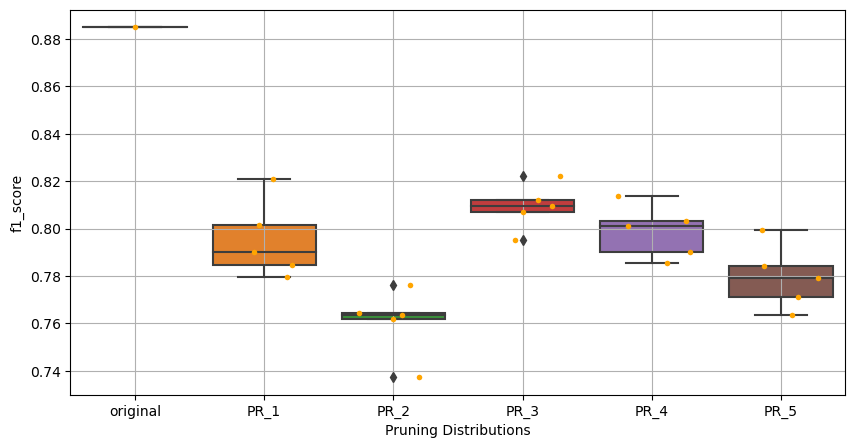

In [12]:
plt.rcParams['figure.figsize'] = [10, 5]


ax = sns.boxplot(x='model_type', y='metric', data=df_pruned, order=["original", "PR_1", "PR_2", "PR_3", "PR_4", "PR_5"])
# add stripplot
ax = sns.stripplot(x='model_type', y='metric', data=df_pruned, color="orange", jitter=0.3, size=4, order=["original", "PR_1", "PR_2", "PR_3", "PR_4", "PR_5"])

ax.yaxis.grid(True) # Hide the horizontal gridlines
ax.xaxis.grid(True) # Show the vertical gridlines
# add title
ax.set(xlabel='Pruning Distributions', ylabel=f'{args.eval_metric}')
plt.savefig(f'results/{args.dataset}/PR_BOXPLOT.png', dpi=1000)
# show the graph
plt.show()


In [15]:
df_seeds = df[(df.finetuned == True) | (df.model_type == 'original')][['seed','metric']]
df_seeds = df_seeds.sort_values(by = 'seed')
df_seeds.seed = df_seeds.apply(lambda x: str(int(x.seed)) if x.seed == x.seed else 'original', axis = 1 )

In [16]:
df_seeds.seed.unique().tolist()


['23', '42', '97', '112', '167', 'original']

In [17]:
#seed_type_names = {'23':'1',
#                    '42':'2',
#                    '97':'3',
#                    '112':'4',
#                    '167':'5',
#                    '214':'6',
#                    '256':'7',
#                    '333':'8',
#                    '425':'9',
#                    '512':'10',
#                    'original':'original'
#                   }

seed_type_names = {'23':'1',
                    '42':'2',
                    '97':'3',
                    '112':'4',
                    '167':'5',
                    'original':'original'
                   }

In [18]:
df_seeds.seed = df_seeds.seed.map(seed_type_names)

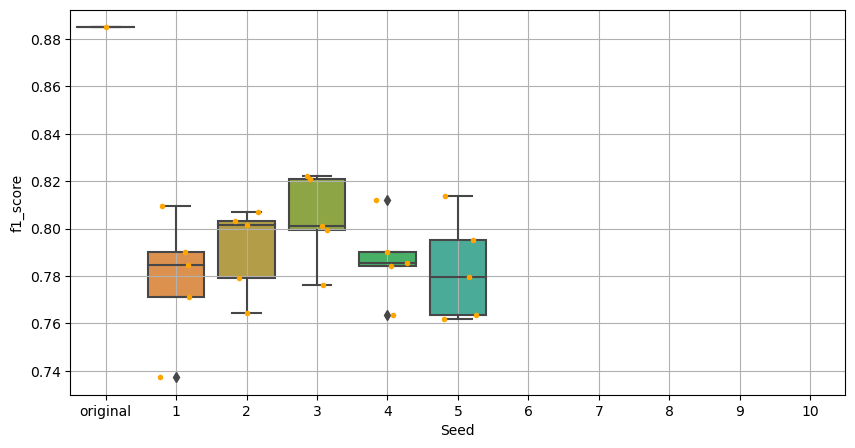

In [19]:
plt.rcParams['figure.figsize'] = [10, 5]

ax = sns.boxplot(x='seed', y='metric', data=df_seeds, order= ['original', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
# add stripplot
ax = sns.stripplot(x='seed', y='metric', data=df_seeds, color="orange", jitter=0.3, size=4, order=  ['original', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

ax.yaxis.grid(True) # Hide the horizontal gridlines
ax.xaxis.grid(True) # Show the vertical gridlines
# add title
ax.set(xlabel='Seed', ylabel=f'{args.eval_metric}')
# show the graph
plt.savefig(f'results/{args.dataset}/SEED_BOXPLOT.png', dpi=1000)
plt.show()
